# Network Science

# Project: Dolphine Network

## Prof. Franck Kalala

<p style="font-size=25px">
<li>
    <ul><span style="font-size: 18px"> Alain </span></ul>
    <ul><span style="font-size: 18px"> Dela </span></ul>
    <ul><span style="font-size: 18px"> Jane </span></ul>
    <ul><span style="font-size: 18px"> Mustafa </span></ul>
    <ul><span style="font-size: 18px"> Sally </span></ul>
</p>
    </li>

<p style="font-size:18px">To complete our work, we need some importants library, for visualisation, calculation, list comprehension, etc. Thus we need to import them.</p>

In [1]:
import networkx as nx
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms import approximation
from networkx.drawing.layout import bipartite_layout
import pandas as pd
import math
from scipy.cluster import hierarchy
from scipy.spatial import distance
from community import community_louvain
import matplotlib.cm as cm
import networkx.algorithms.community as nxcom

<p style="font-size:18px">After importing the necessary libraries, we are now able to move on with the work. We first import the network as a graph, and the  we visualize it using pajek, Kamada-kawai, Sping and </p>

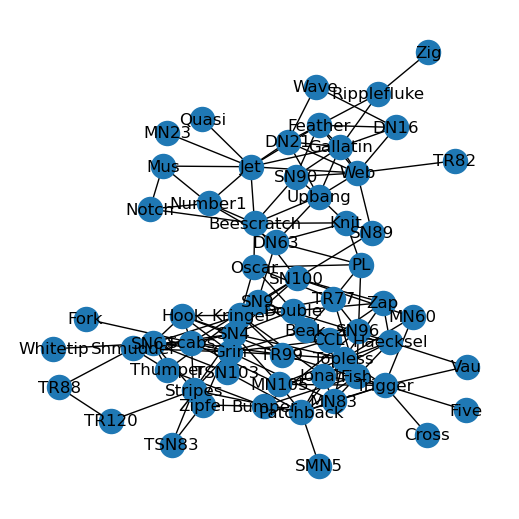

In [2]:
dolph = nx.read_gml('dolphins.gml')
plt.figure(figsize=(5,5))
nx.draw_kamada_kawai(dolph,with_labels=True)
plt.show()
#The Kamada-Kawai graph layout attempts to position nodes on the space so that the geometric (Euclidean) 
#distance between them is as close as possible to the graph-theoretic (path) distance between them.

<p style="font-size:18px">When looking at the network in the different configurations above we do the following observations:
<ul style="font-size:18px">
    <li> All the nodes in the network are connected, this means, there is only one component.</li>
    <li> There are many nodes with of degree 1, and "Zig" is surely the farthest node.</li>
    <li> We equally observe the presence of some hubs.</li>
    <li> We can also speculate on the existance of a relatively large amount of community.</li>
</ul>
</p>

<p style="font-size:18px">Another characteristic of this networkis it structre, indeed our network is hybrid. We can speculate on the nature of the subgraph that constitute it; mesh, ring, star.</p>

<p style="font-size:18px">Below we present some statistics of the network,</p>

In [3]:
len(list(nx.nodes(dolph))),len(list(nx.edges(dolph)))

(62, 159)

<p style="font-size:18px">The above tell u that there are 62 specimens in our network, and there are L = 159 links. THe maximum number of links we can establish in the network is : $L_{max}=\frac{62\times 61}{2} = 1891$. We have $\frac{L}{L_{max}} = \frac{159}{1891} = 0.084.$ The previous result shows us that the network haw a low density.</p>

In [4]:
nx.eccentricity(dolph)

{'Beak': 6,
 'Beescratch': 5,
 'Bumper': 7,
 'CCL': 7,
 'Cross': 8,
 'DN16': 7,
 'DN21': 6,
 'DN63': 5,
 'Double': 6,
 'Feather': 7,
 'Fish': 7,
 'Five': 8,
 'Fork': 7,
 'Gallatin': 6,
 'Grin': 6,
 'Haecksel': 6,
 'Hook': 7,
 'Jet': 6,
 'Jonah': 7,
 'Knit': 5,
 'Kringel': 6,
 'MN105': 7,
 'MN23': 7,
 'MN60': 6,
 'MN83': 7,
 'Mus': 6,
 'Notch': 6,
 'Number1': 5,
 'Oscar': 5,
 'Patchback': 7,
 'PL': 5,
 'Quasi': 7,
 'Ripplefluke': 7,
 'Scabs': 6,
 'Shmuddel': 7,
 'SMN5': 8,
 'SN100': 5,
 'SN4': 6,
 'SN63': 7,
 'SN89': 5,
 'SN9': 5,
 'SN90': 6,
 'SN96': 6,
 'Stripes': 7,
 'Thumper': 7,
 'Topless': 7,
 'TR120': 8,
 'TR77': 6,
 'TR82': 7,
 'TR88': 8,
 'TR99': 7,
 'Trigger': 7,
 'TSN103': 6,
 'TSN83': 8,
 'Upbang': 5,
 'Vau': 7,
 'Wave': 7,
 'Web': 6,
 'Whitetip': 8,
 'Zap': 6,
 'Zig': 8,
 'Zipfel': 7}

<p style="font-size:18px">The eccentricity of a node is the maximum distance that seperate it from all other node in the network. This is very usefull because from this we can extract the radius and the diameter of the network, whish are respectively the minimum and the maximum eccentricity. In our case, the radius is 5 and the diameter is 8.</p>

In [5]:
#This can also be done by just returning the min and the max respectively 
#of the values of the eccentricity dictionnary
nx.radius(dolph),nx.diameter(dolph)

(5, 8)

<p style="font-size:18px">The clustering coefficient tells us the chances that nodes related to a common node are related. The transitivity  tell us the percentage of triangles(closed triplets) in the network. The average clustering and the transitivity in the network is given by:</p> 

In [6]:
#To find the average clustering you can either use the in-built function or
#You can just return the mean of the values of the dictionnary clustering, which we have done.
np.mean(list(dict(nx.clustering(dolph)).values())), nx.transitivity(dolph)

(0.2589582460550202, 0.3087757313109426)

In [28]:
nx.clustering(dolph)

{'Beak': 0.3333333333333333,
 'Beescratch': 0.14285714285714285,
 'Bumper': 0.16666666666666666,
 'CCL': 0.3333333333333333,
 'Cross': 0,
 'DN16': 0.5,
 'DN21': 0.5333333333333333,
 'DN63': 0.2,
 'Double': 0.26666666666666666,
 'Feather': 0.5238095238095238,
 'Fish': 0.4,
 'Five': 0,
 'Fork': 0,
 'Gallatin': 0.5,
 'Grin': 0.25757575757575757,
 'Haecksel': 0.23809523809523808,
 'Hook': 0.6,
 'Jet': 0.2222222222222222,
 'Jonah': 0.5238095238095238,
 'Knit': 0.5,
 'Kringel': 0.1388888888888889,
 'MN105': 0.5333333333333333,
 'MN23': 0,
 'MN60': 0.3333333333333333,
 'MN83': 0.5333333333333333,
 'Mus': 0.6666666666666666,
 'Notch': 0.6666666666666666,
 'Number1': 0.4,
 'Oscar': 0.3,
 'Patchback': 0.25,
 'PL': 0.3,
 'Quasi': 0,
 'Ripplefluke': 0.3333333333333333,
 'Scabs': 0.3333333333333333,
 'Shmuddel': 0.3,
 'SMN5': 0,
 'SN100': 0.047619047619047616,
 'SN4': 0.23636363636363636,
 'SN63': 0.2857142857142857,
 'SN89': 0,
 'SN9': 0.25,
 'SN90': 0.6,
 'SN96': 0.3333333333333333,
 'Stripes': 0

<p style="font-size:18px">We have determine that in our network, the nodes have on average 5 neighbors and average shrothest path lenght is 4. This means if node have to reach another in the network, it has to do on average 4 steps. Following the theorem of small world, we can say that 4 nodes at least seperate any 2 nodes in the network.</p>

In [7]:
np.array(list(dict(nx.degree(dolph)).values())).mean()
#Here we determine the average degree; at mean the nodes have 5 closest neighbor. 

5.129032258064516

In [8]:
nx.average_shortest_path_length(dolph)
#Since there is not half path, we can approximate this to 4. 
#This result means that there is and average of 4 steps between any given pairs of nodes in the graph. 

3.3569539925965097

In [12]:
nx.wiener_index(dolph)

6348.0

<p style="font-size:18px">The density represents the number of actual connections divided by the number of possible connections in the ntwork</p>

In [27]:
nx.density(dolph)

0.08408249603384453

<p style="font-size:18px">Now that we have the degree distribution, we want to create a dictionnary where the keys are the degree and the values are the frequency. This will help us to plot the clustering vs degree graph.</p>

In [83]:
n=dict() #We create an empty list to store the normalise degree distribution
m=dict() #We create an empty list to store the degree distribution
for i in range(len(nx.degree_histogram(dolph))):
    if nx.degree_histogram(dolph)[i]!=0: #There is  no node of degree 0 in the network thus we exclude the case
        n.update({i:nx.degree_histogram(dolph)[i]/len(nx.nodes(dolph))})#We populate the lis with the 
        #degree value and the corresponding probability
        m.update({i:nx.degree_histogram(dolph)[i]})
 #the function nx.degree_histogram returns a list of the frequency of each degree value.
m # returns the degree distribution

{1: 9, 2: 6, 3: 6, 4: 5, 5: 8, 6: 8, 7: 7, 8: 4, 9: 4, 10: 2, 11: 2, 12: 1}

<p style="font-size:18px">Below we plot the degree distribution of our network, and the histogram degree  distribution</p>

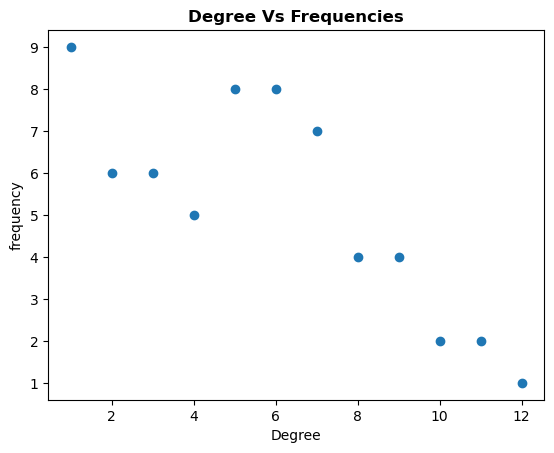

In [84]:
plt.scatter(m.keys(),[i for i in m.values()])
plt.title('Degree Vs Frequencies', fontweight ="bold")
plt.xlabel('Degree')
plt.ylabel('frequency')
plt.show()


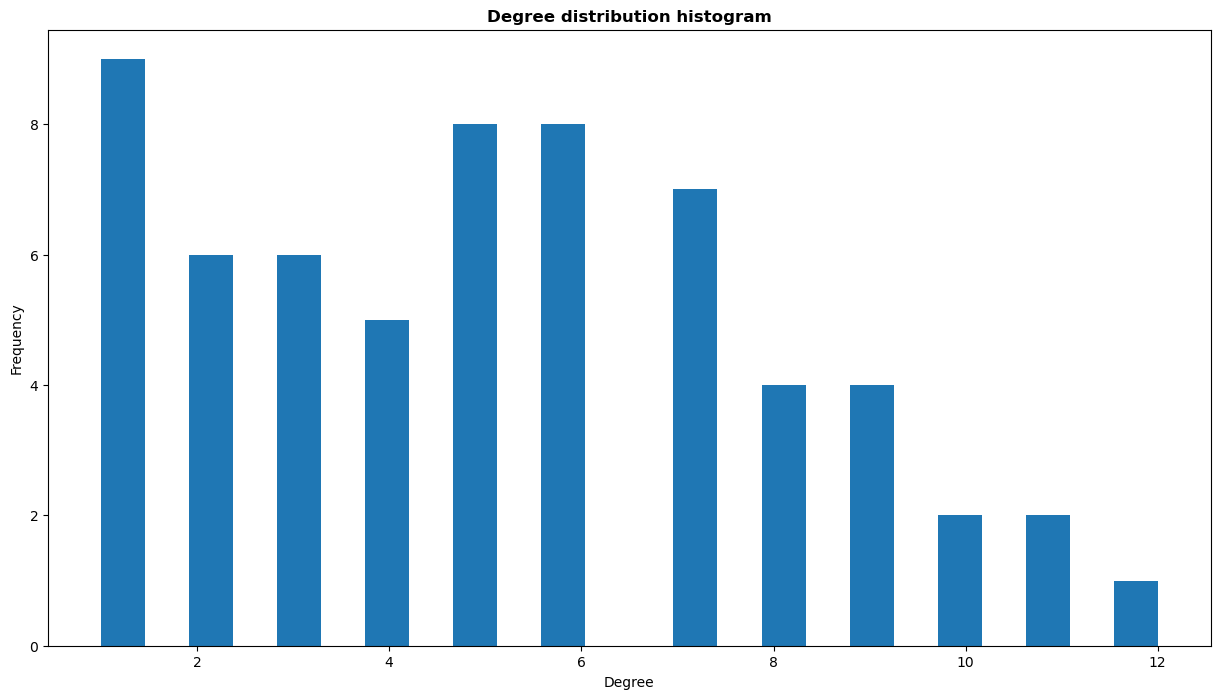

In [85]:
norm = [i for i in list(dict(nx.degree(dolph)).values())]
plt.figure(figsize=(15,8))
plt.hist(norm,bins=24)
plt.title('Degree distribution histogram', fontweight ="bold")
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

<p style="font-size:18px"> We equally plot the complementary degree distribution. To do so, we create a dictionnary which contains the complementary degree distribution according to each degree</p>

In [87]:
liss =[i/62 for i in list(dict(m).values())] #This list holds the probability degree distribution
liss2 = [0]
sum2 = 0
for i in range(len(liss)):
    sum2 +=liss[i]
    liss2.append(sum2) #The purpose of this for loop is to create a loop that holds the cummulative degree distribution
liss3 = [1-i for i in liss2] #Complementary cummulative degree distribution 1-CDF(k)
liss3.pop(11) 
dict3=dict()
for i in range(len(liss3)):
    dict3.update({list(m.keys())[i]:liss3[i]}) #This for loop create a dictionnary with Complementary CDF(k)
dict3

{1: 1,
 2: 0.8548387096774194,
 3: 0.7580645161290323,
 4: 0.6612903225806451,
 5: 0.5806451612903225,
 6: 0.4516129032258065,
 7: 0.32258064516129037,
 8: 0.20967741935483875,
 9: 0.14516129032258074,
 10: 0.08064516129032273,
 11: 0.04838709677419373,
 12: 2.220446049250313e-16}

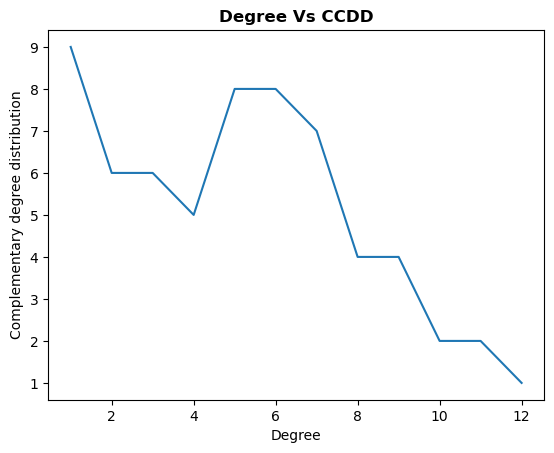

In [88]:
plt.plot(m.keys(),[i for i in m.values()])
plt.title('Degree Vs CCDD', fontweight ="bold")
plt.xlabel('Degree')
plt.ylabel('Complementary degree distribution')
plt.show()

<p style="font-size:18px"> Below we are plotting the degree in terms of their probability. We also plot a line showing some trend in the data. We can say that, the higher the clustering, the lower the degree.</p>

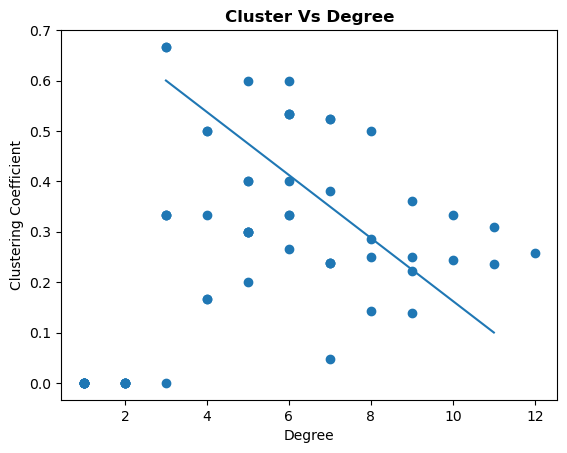

In [82]:
plt.scatter(list(dict(nx.degree(dolph)).values()),list(dict(nx.clustering(dolph)).values()))
plt.plot([3,11],[0.6,0.1])
plt.title('Cluster Vs Degree', fontweight ="bold")
plt.xlabel('Degree')
plt.ylabel('Clustering Coefficient')
plt.show()

<p style="font-size:18px">The informations we have of a node from the centrality are the number of neighbors, how close is it of other nodes and how mane group of nodes does it link. Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors.</p>

In [21]:
nx.degree_centrality(dolph)

{'Beak': 0.09836065573770492,
 'Beescratch': 0.13114754098360656,
 'Bumper': 0.06557377049180328,
 'CCL': 0.04918032786885246,
 'Cross': 0.01639344262295082,
 'DN16': 0.06557377049180328,
 'DN21': 0.09836065573770492,
 'DN63': 0.0819672131147541,
 'Double': 0.09836065573770492,
 'Feather': 0.11475409836065574,
 'Fish': 0.0819672131147541,
 'Five': 0.01639344262295082,
 'Fork': 0.01639344262295082,
 'Gallatin': 0.13114754098360656,
 'Grin': 0.19672131147540983,
 'Haecksel': 0.11475409836065574,
 'Hook': 0.09836065573770492,
 'Jet': 0.14754098360655737,
 'Jonah': 0.11475409836065574,
 'Knit': 0.06557377049180328,
 'Kringel': 0.14754098360655737,
 'MN105': 0.09836065573770492,
 'MN23': 0.01639344262295082,
 'MN60': 0.04918032786885246,
 'MN83': 0.09836065573770492,
 'Mus': 0.04918032786885246,
 'Notch': 0.04918032786885246,
 'Number1': 0.0819672131147541,
 'Oscar': 0.0819672131147541,
 'Patchback': 0.14754098360655737,
 'PL': 0.0819672131147541,
 'Quasi': 0.01639344262295082,
 'Ripplefluk

In [22]:
nx.betweenness_centrality(dolph)

{'Beak': 0.01908259621374376,
 'Beescratch': 0.21332443553281097,
 'Bumper': 0.00907281243346817,
 'CCL': 0.0023737965131407756,
 'Cross': 0.0,
 'DN16': 0.004380300179480508,
 'DN21': 0.029372536747686685,
 'DN63': 0.11823861926938342,
 'Double': 0.022365737598409235,
 'Feather': 0.020894380361593475,
 'Fish': 0.016092020911693046,
 'Five': 0.0,
 'Fork': 0.0,
 'Gallatin': 0.05284632843869151,
 'Grin': 0.06197200484885411,
 'Haecksel': 0.03329222098223321,
 'Hook': 0.0033047098620869113,
 'Jet': 0.11430016291546972,
 'Jonah': 0.014854899716954898,
 'Knit': 0.013314394166853183,
 'Kringel': 0.10264573972090968,
 'MN105': 0.012700653930162125,
 'MN23': 0.0,
 'MN60': 0.04218278563875618,
 'MN83': 0.007383043489600868,
 'Mus': 0.0016441148408361526,
 'Notch': 0.00436247723132969,
 'Number1': 0.029236860493157983,
 'Oscar': 0.06675695466395656,
 'Patchback': 0.06552928249649563,
 'PL': 0.03305046077177225,
 'Quasi': 0.0,
 'Ripplefluke': 0.03278688524590164,
 'Scabs': 0.057166440117259784,
 '

In [23]:
nx.closeness_centrality(dolph)

{'Beak': 0.3465909090909091,
 'Beescratch': 0.3719512195121951,
 'Bumper': 0.2824074074074074,
 'CCL': 0.30808080808080807,
 'Cross': 0.24897959183673468,
 'DN16': 0.23828125,
 'DN21': 0.2675438596491228,
 'DN63': 0.3652694610778443,
 'Double': 0.3630952380952381,
 'Feather': 0.25206611570247933,
 'Fish': 0.3128205128205128,
 'Five': 0.24897959183673468,
 'Fork': 0.2687224669603524,
 'Gallatin': 0.27111111111111114,
 'Grin': 0.3765432098765432,
 'Haecksel': 0.3388888888888889,
 'Hook': 0.32972972972972975,
 'Jet': 0.3096446700507614,
 'Jonah': 0.3370165745856354,
 'Knit': 0.3160621761658031,
 'Kringel': 0.391025641025641,
 'MN105': 0.3333333333333333,
 'MN23': 0.23735408560311283,
 'MN60': 0.3333333333333333,
 'MN83': 0.3128205128205128,
 'Mus': 0.25523012552301255,
 'Notch': 0.2772727272727273,
 'Number1': 0.3160621761658031,
 'Oscar': 0.3652694610778443,
 'Patchback': 0.32275132275132273,
 'PL': 0.32275132275132273,
 'Quasi': 0.23735408560311283,
 'Ripplefluke': 0.21631205673758866,


In [24]:
nx.eigenvector_centrality(dolph)

{'Beak': 0.12850351911087216,
 'Beescratch': 0.04209144143572482,
 'Bumper': 0.03975713309801052,
 'CCL': 0.0793344760744552,
 'Cross': 0.029287057142628203,
 'DN16': 0.006572752164517534,
 'DN21': 0.01221198028654735,
 'DN63': 0.04290802005630267,
 'Double': 0.14310221675120963,
 'Feather': 0.012220169764468432,
 'Fish': 0.07525346435103514,
 'Five': 0.029287057142628203,
 'Fork': 0.03907586116163528,
 'Gallatin': 0.01503041548748069,
 'Grin': 0.3157810764804676,
 'Haecksel': 0.16417491138339663,
 'Hook': 0.20799316926734235,
 'Jet': 0.017534968338682348,
 'Jonah': 0.2024930012424762,
 'Knit': 0.020682545955984937,
 'Kringel': 0.18447787335323979,
 'MN105': 0.20734961722376988,
 'MN23': 0.0024382375398253444,
 'MN60': 0.08736202260403908,
 'MN83': 0.19321180983300906,
 'Mus': 0.005952326426510386,
 'Notch': 0.00894919228768804,
 'Number1': 0.01632668732073103,
 'Oscar': 0.06822697202643725,
 'Patchback': 0.2117610946447422,
 'PL': 0.040750650987826376,
 'Quasi': 0.0024382375398253444,

<p style="font-size:18px">We Proceed to communities in our network. We begin by determining The different communities of the network</p>

In [92]:
partition = community_louvain.best_partition(dolph)
for i in set(partition.values()):
    print ("community",i)
    members = list_nodes = [nodes for nodes in partition.keys() if partition[nodes]==i]
    print (members)

community 0
['Beak', 'Bumper', 'DN63', 'Fish', 'Knit', 'PL', 'SN96', 'TR77']
community 1
['Beescratch', 'DN16', 'DN21', 'Feather', 'Gallatin', 'Jet', 'MN23', 'Mus', 'Notch', 'Number1', 'Quasi', 'Ripplefluke', 'SN90', 'TR82', 'Upbang', 'Wave', 'Web', 'Zig']
community 2
['CCL', 'Double', 'Kringel', 'Oscar', 'SN100', 'SN89', 'Zap']
community 3
['Cross', 'Five', 'Haecksel', 'Jonah', 'MN105', 'MN60', 'MN83', 'Patchback', 'SMN5', 'Topless', 'Trigger', 'Vau']
community 4
['Fork', 'Grin', 'Hook', 'Scabs', 'Shmuddel', 'SN4', 'SN63', 'SN9', 'Stripes', 'Thumper', 'TR120', 'TR88', 'TR99', 'TSN103', 'TSN83', 'Whitetip', 'Zipfel']


<p style="font-size:18px">They are 5 differents communities in the network. Let's vizualise them.</p>

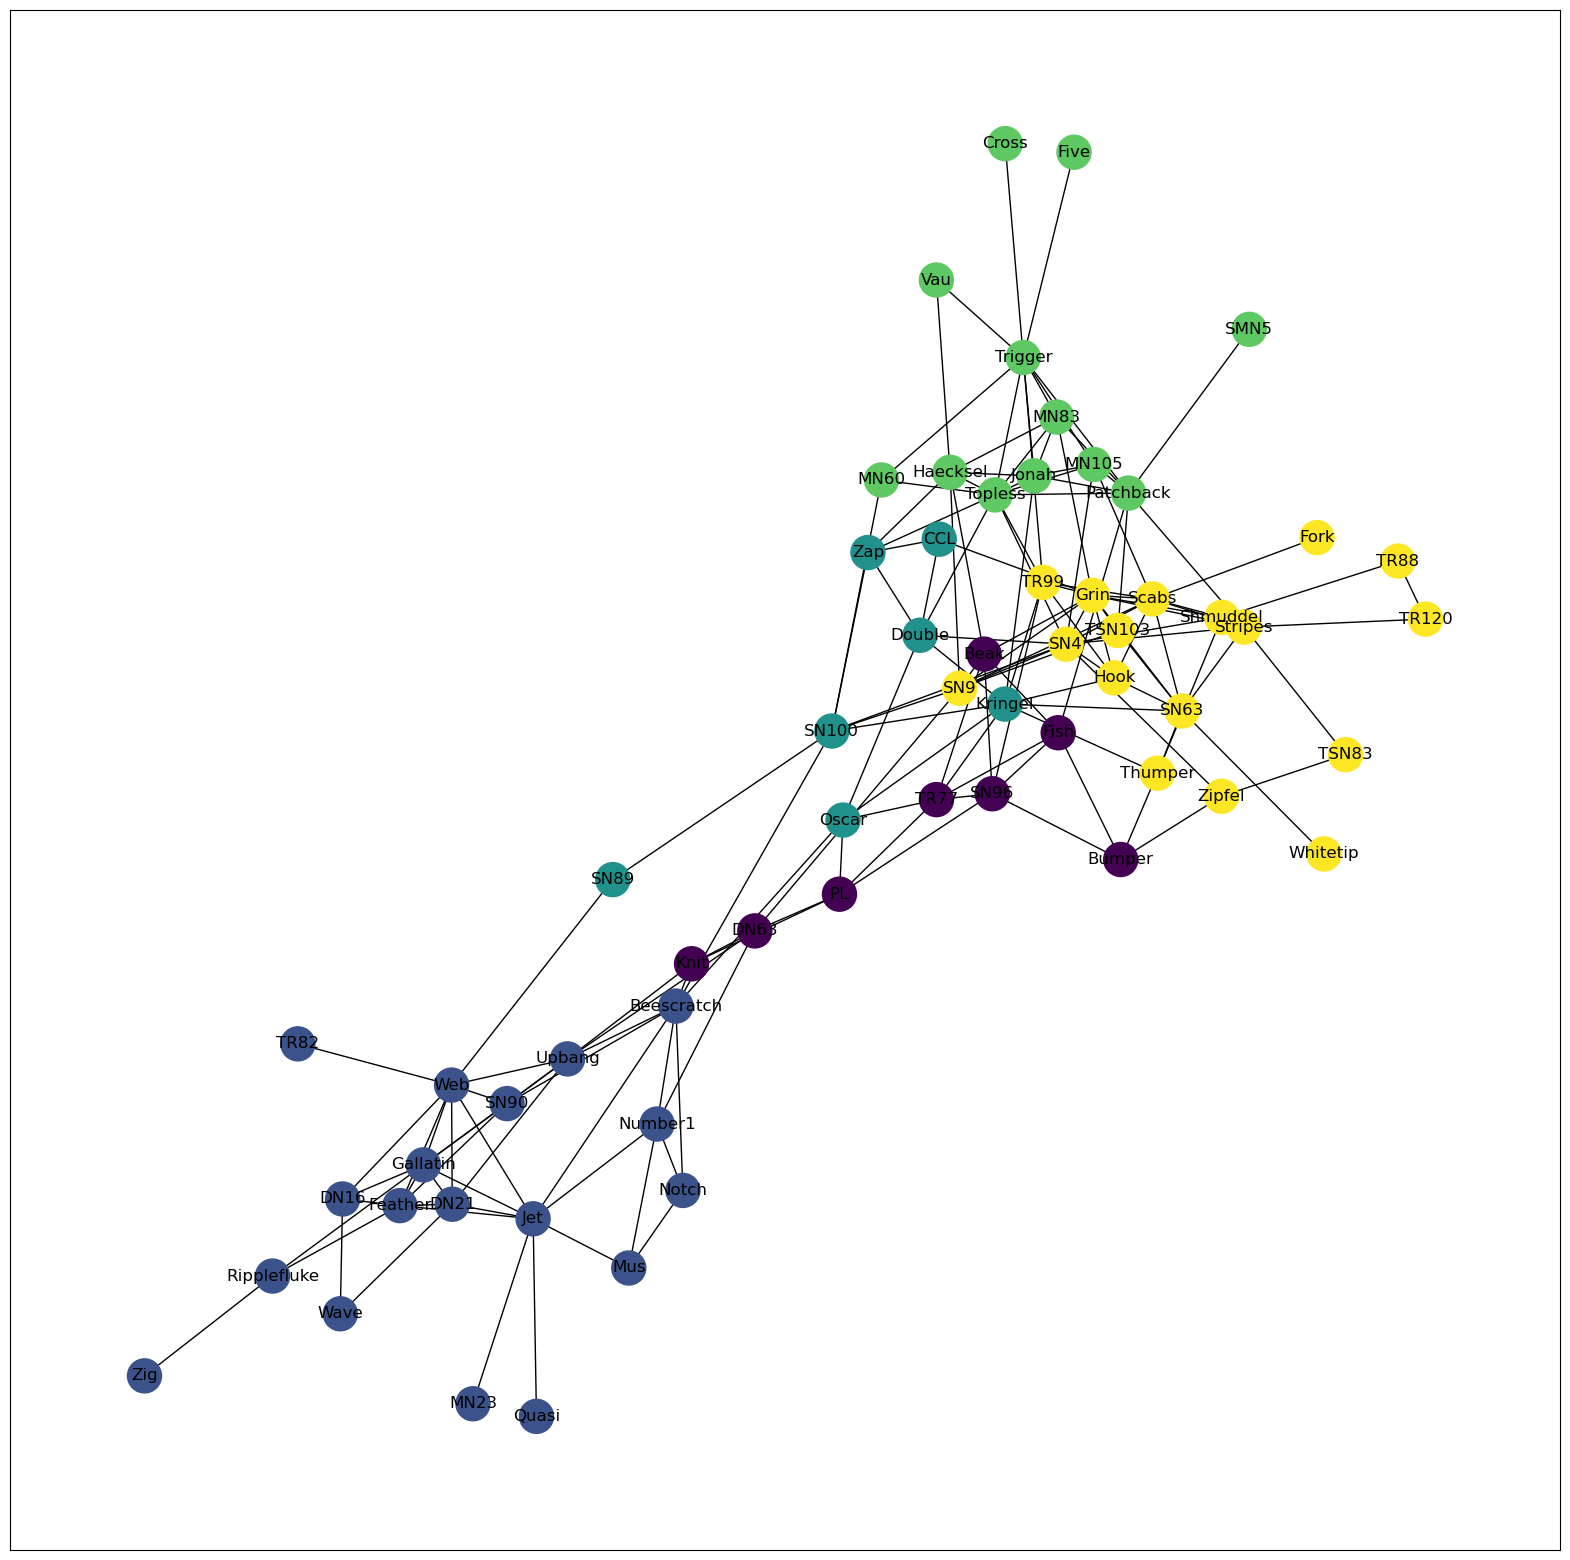

In [93]:
# compute the best partition
plt.figure(figsize=(20,20))
# draw the graph
pos = nx.spring_layout(dolph)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(dolph, pos, partition.keys(), node_size=600,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(dolph, pos)
nx.draw_networkx_labels(dolph,pos)
plt.show()

<p style="font-size:18px">The vizualisation above only gives us infomation about the communties and the members. Let's make it interesting and point out the most important node in the communities</p>

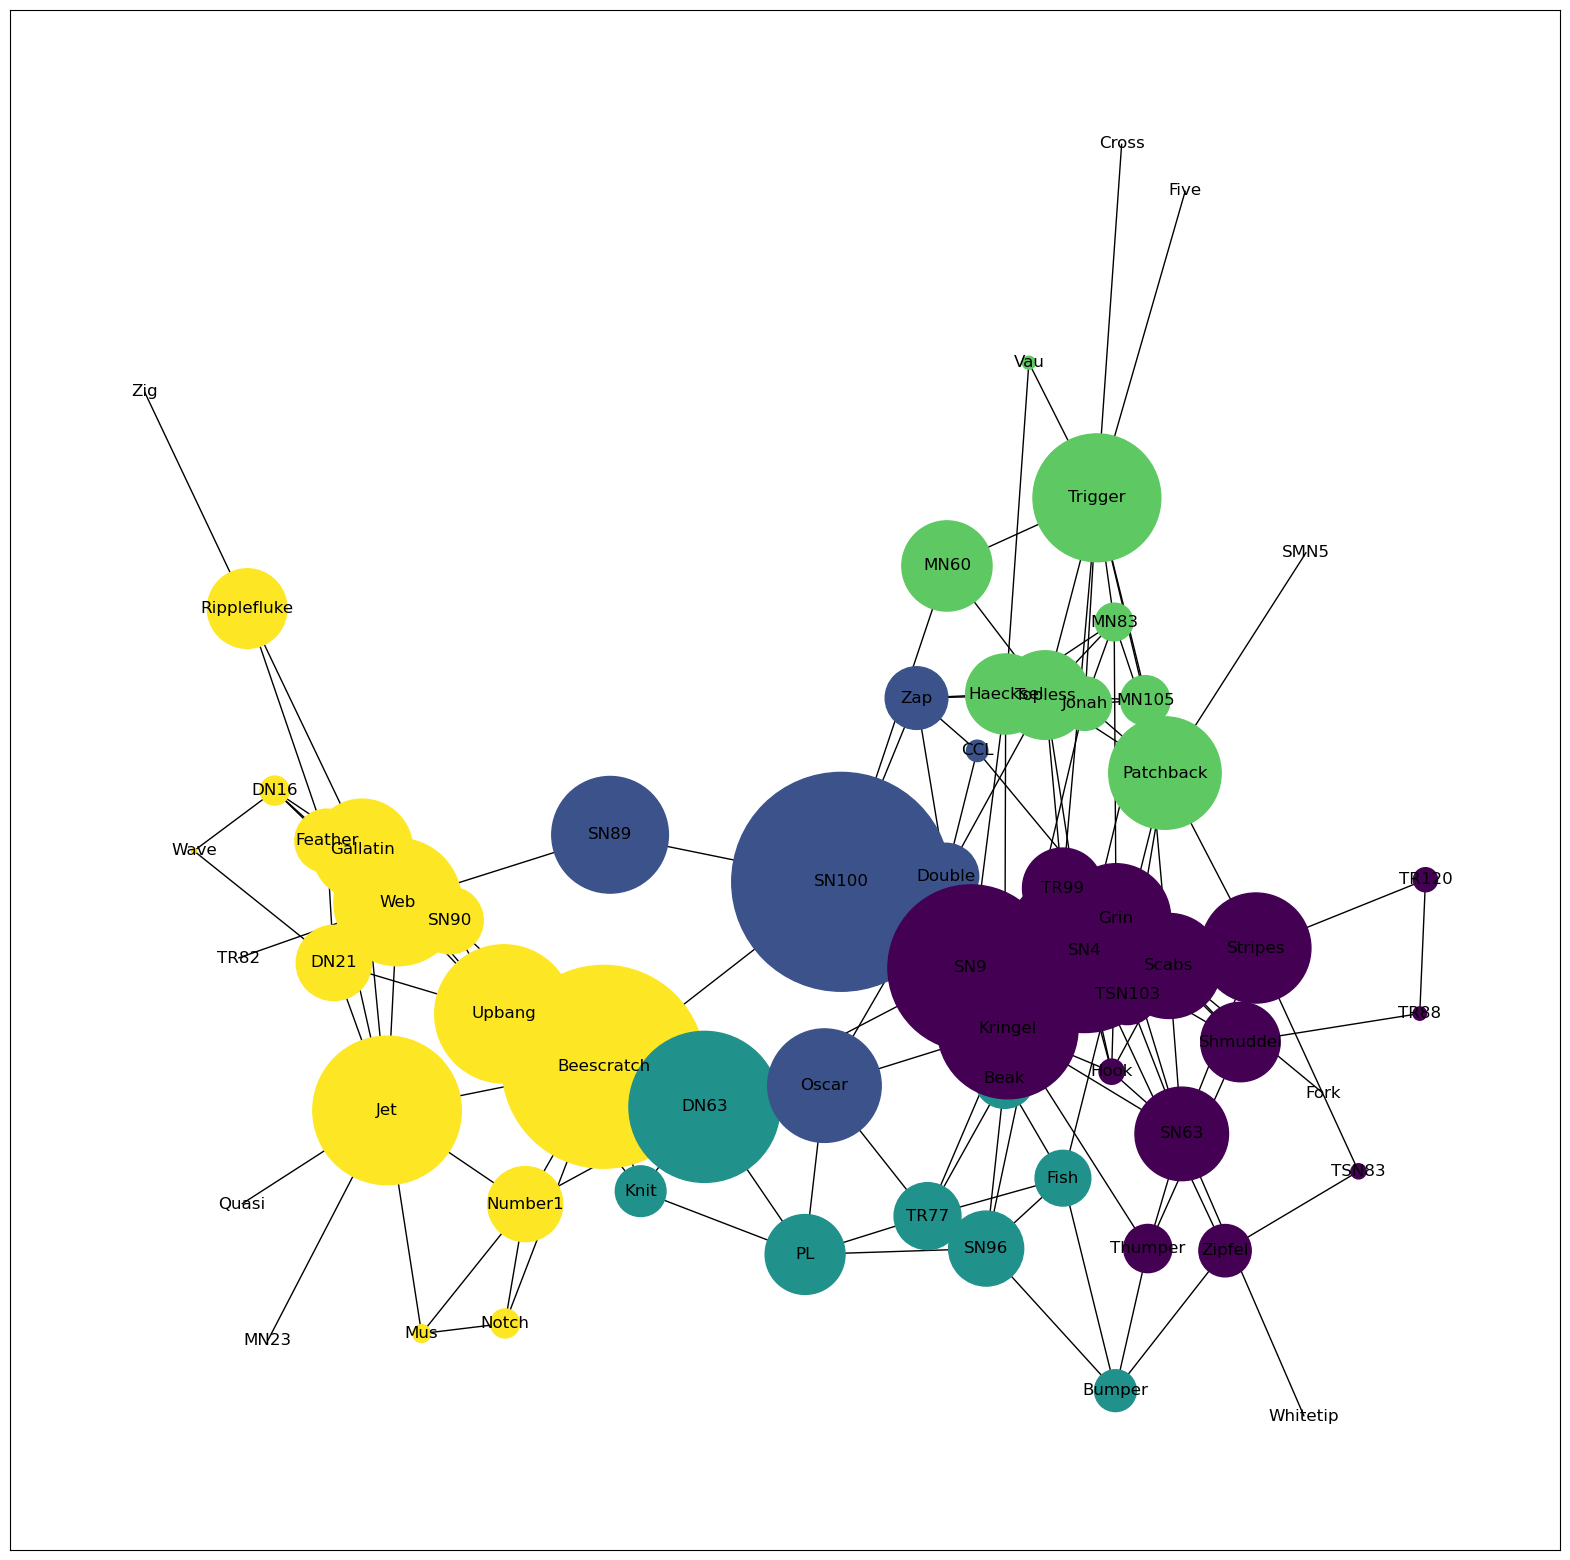

In [94]:
# compute the best partition
d = dict(dolph.degree)
d1 = dict(nx.betweenness_centrality(dolph))
partition = community_louvain.best_partition(dolph)
plt.figure(figsize=(20,20))
# draw the graph
pos = nx.spring_layout(dolph)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(dolph, pos, partition.keys(), node_size=[v * 100000 for v in d1.values()],
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(dolph, pos)
nx.draw_networkx_labels(dolph,pos)
plt.show()

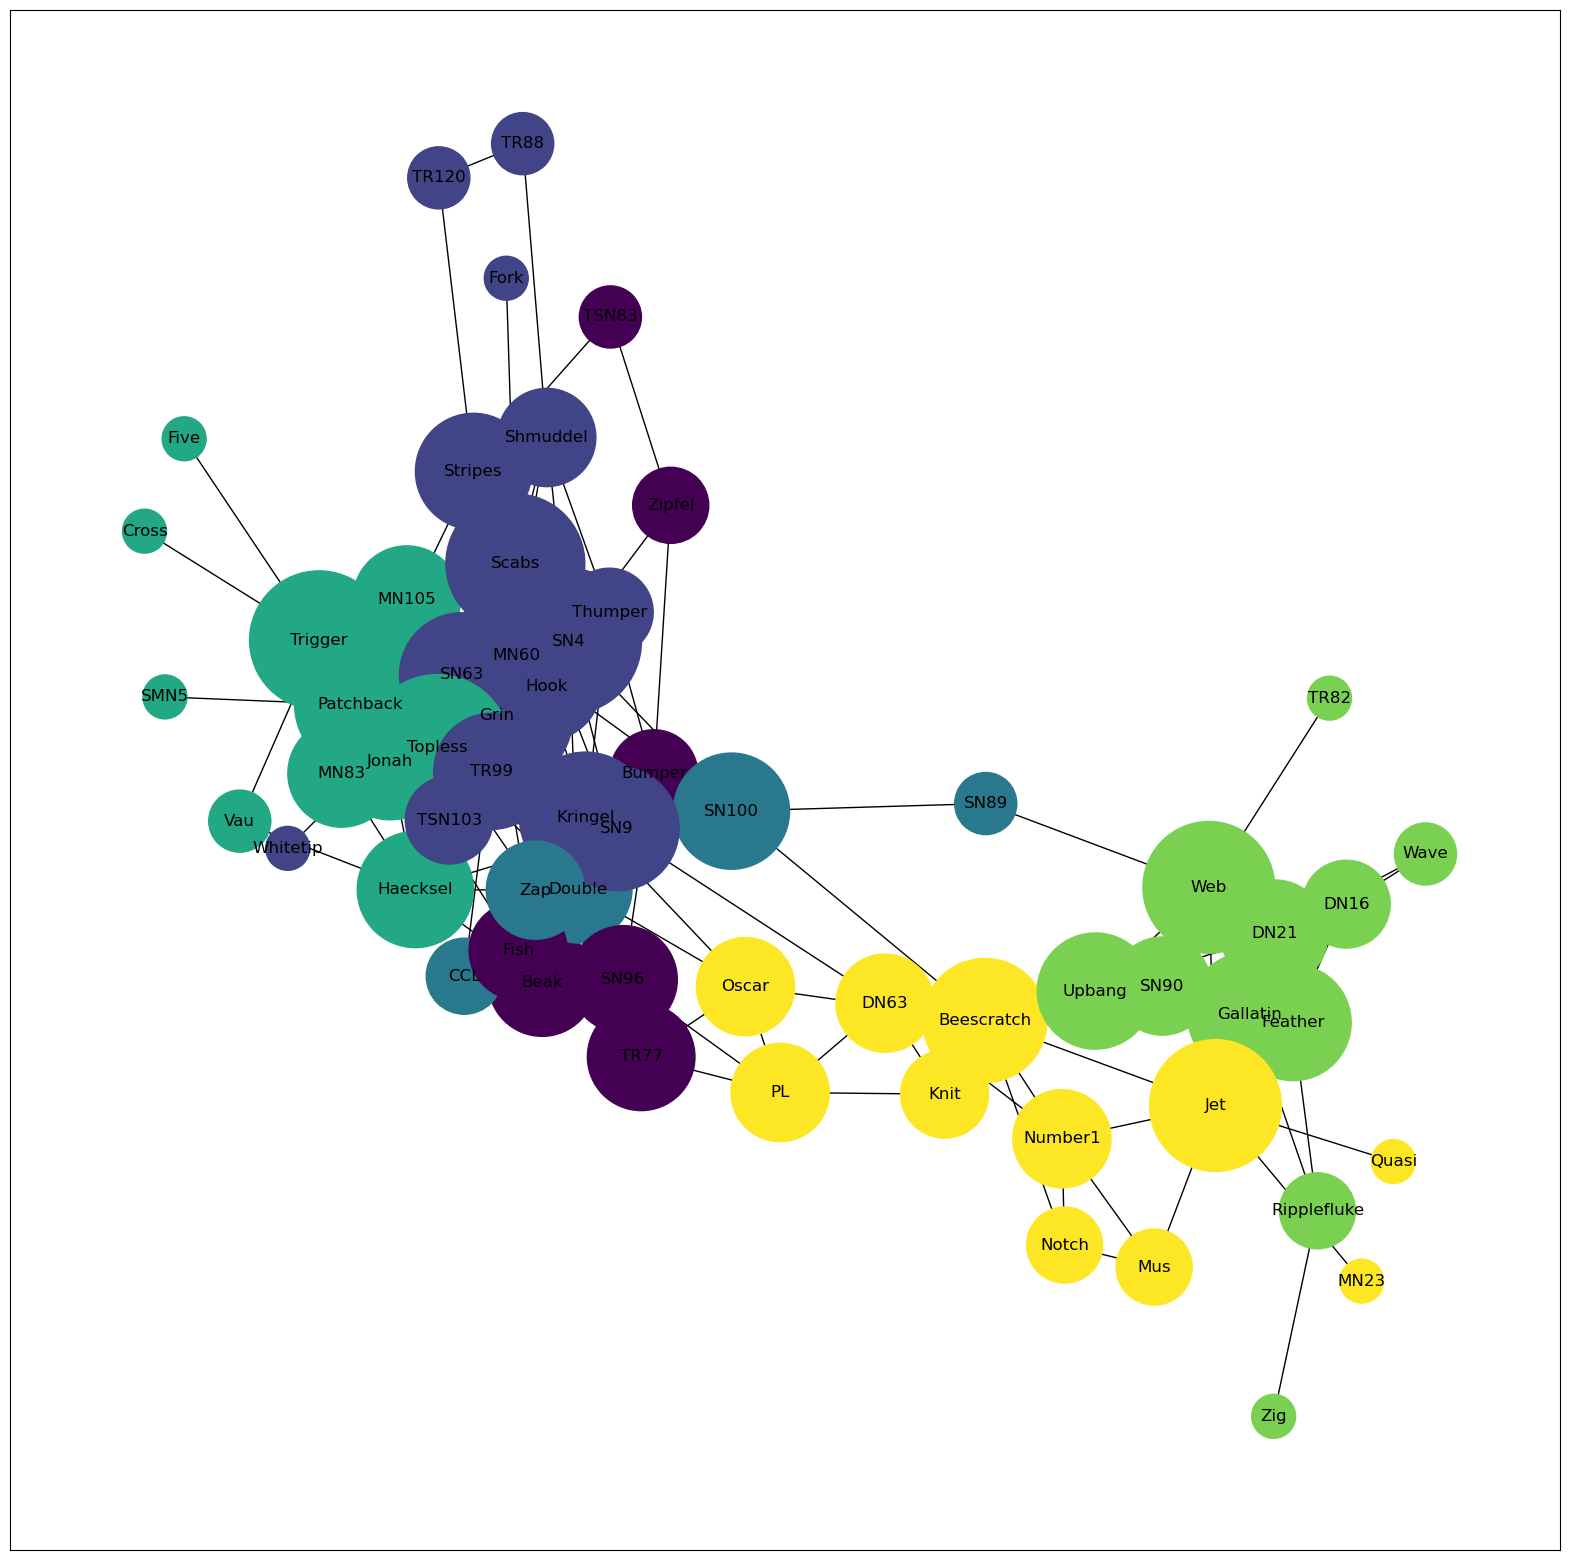

In [97]:
# compute the best partition
d = dict(dolph.degree)
d1 = dict(nx.betweenness_centrality(dolph))
partition = community_louvain.best_partition(dolph)
plt.figure(figsize=(20,20))
# draw the graph
pos = nx.spring_layout(dolph)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(dolph, pos, partition.keys(), node_size=[v * 1000 for v in d.values()],
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(dolph, pos)
nx.draw_networkx_labels(dolph,pos)
plt.show()

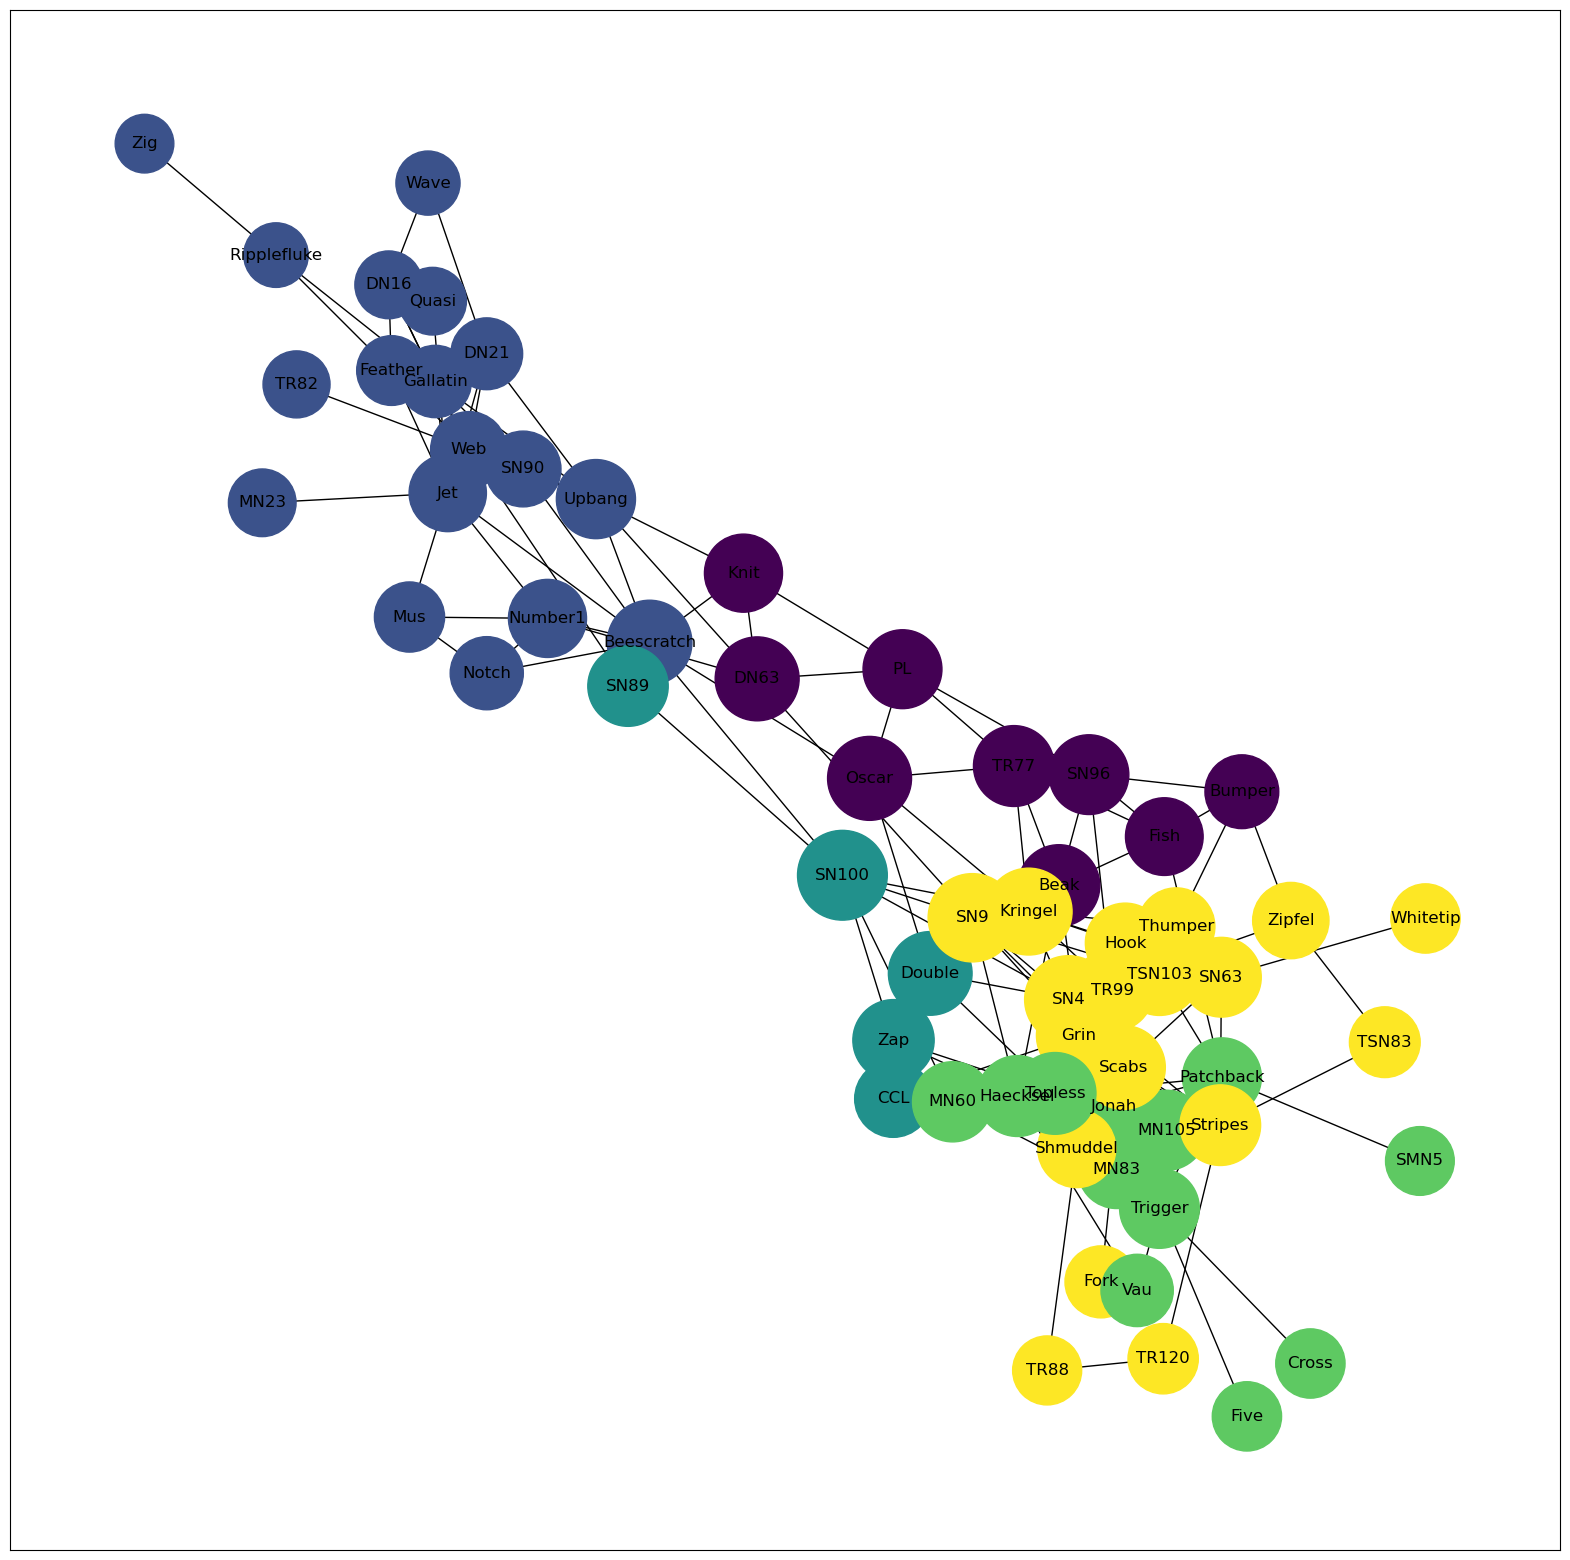

In [100]:
# compute the best partition
d = dict(dolph.degree)
d1 = dict(nx.betweenness_centrality(dolph))
d2 = dict(nx.closeness_centrality(dolph))
partition = community_louvain.best_partition(dolph)
plt.figure(figsize=(20,20))
# draw the graph
pos = nx.spring_layout(dolph)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(dolph, pos, partition.keys(), node_size=[v * 10000 for v in d2.values()],
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(dolph, pos)
nx.draw_networkx_labels(dolph,pos)
plt.show()